<a href="https://colab.research.google.com/github/upwind1993/Numerical-Analysis/blob/main/15%EC%9E%A5/15%EC%9E%A5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

15장 다항식 회귀분석

예제 15.1

In [14]:
import numpy as np
X = np.matrix('6., 15., 55. ; 15., 55., 225. ; 55., 225., 979.')
const = np.matrix('152.6 ; 585.6 ; 2488.8')
b = np.linalg.solve(X,const)
np.set_printoptions(precision=4)
print('Estimated parameters are\n',b)

Estimated parameters are
 [[2.4786]
 [2.3593]
 [1.8607]]


15-2 다중선형회귀

15.1 예제를 참고하여 프로그램 작성하시오

예제

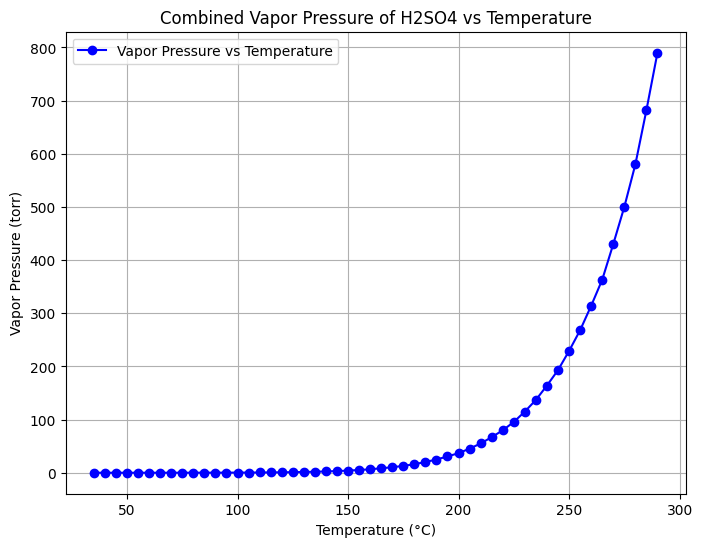

In [15]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


# CSV 파일을 읽어옵니다.
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/H2SO4_VaporPressureData.csv')
# 온도와 증기압 열을 선택하여 합칩니다 (열 이름에 "Temperature"와 "Vapor Pressure"가 포함된 열들을 찾습니다)
temperature_columns = [col for col in data.columns if 'Temperature' in col]
vapor_pressure_columns = [col for col in data.columns if 'Vapor Pressure' in col]

# 각각의 열들을 결합하여 단일 온도 및 증기압 배열 생성
T = pd.concat([data[col] for col in temperature_columns], ignore_index=True).dropna()
VP = pd.concat([data[col] for col in vapor_pressure_columns], ignore_index=True).dropna()

# 그래프 그리기
plt.figure(figsize=(8, 6))
plt.plot(T, VP, marker='o', linestyle='-', color='b', label='Vapor Pressure vs Temperature')
plt.xlabel('Temperature (°C)')
plt.ylabel('Vapor Pressure (torr)')
plt.title('Combined Vapor Pressure of H2SO4 vs Temperature')
plt.legend()
plt.grid(True)
plt.show()

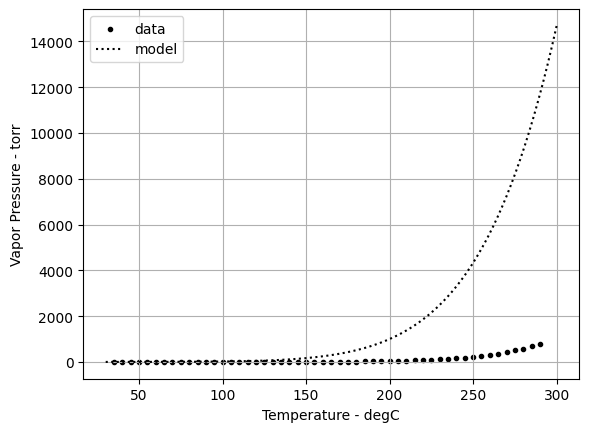

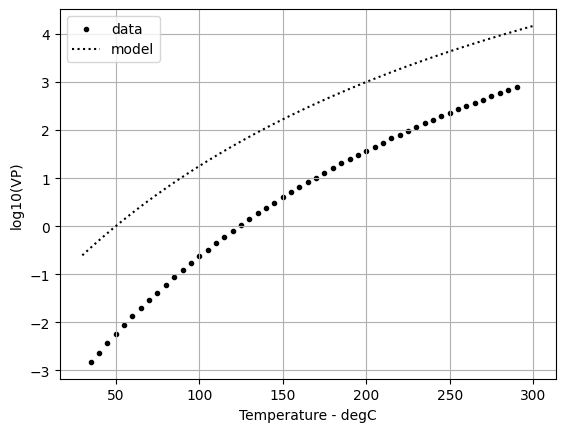

In [16]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


# CSV 파일을 읽어옵니다.
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/H2SO4_VaporPressureData.csv')
# 온도와 증기압 열을 선택하여 합칩니다 (열 이름에 "Temperature"와 "Vapor Pressure"가 포함된 열들을 찾습니다)
temperature_columns = [col for col in data.columns if 'Temperature' in col]
vapor_pressure_columns = [col for col in data.columns if 'Vapor Pressure' in col]

# 각각의 열들을 결합하여 단일 온도 및 증기압 배열 생성
T = pd.concat([data[col] for col in temperature_columns], ignore_index=True).dropna()
VP = pd.concat([data[col] for col in vapor_pressure_columns], ignore_index=True).dropna()

pylab.scatter(T,VP,c='k',marker='.',label='data')
pylab.grid()
pylab.xlabel('Temperature - degC')
pylab.ylabel('Vapor Pressure - torr')
# initial guess for parameters
A = 10
B = 3500
C = 300
# plot model curve
Tplot = np.linspace(30.,300.,100)
VPplot = 10**(A-B/(C+Tplot))
pylab.plot(Tplot,VPplot,c='k',ls=':',label='model')
pylab.legend()
# log-transform VP data and generate similar plot
logVP = np.log10(VP)
pylab.figure()
pylab.scatter(T,logVP,c='k',marker='.',label='data')
pylab.grid()
pylab.xlabel('Temperature - degC')
pylab.ylabel('log10(VP)')
logVPplot = np.log10(VPplot)
pylab.plot(Tplot,logVPplot,c='k',ls=':',label='model')
pylab.legend()


Python Code for Nonlinear Regression - 1


[   9.8056 3901.7227  273.9286]


Text(0.5, 1.0, 'Nonlinear Regression')

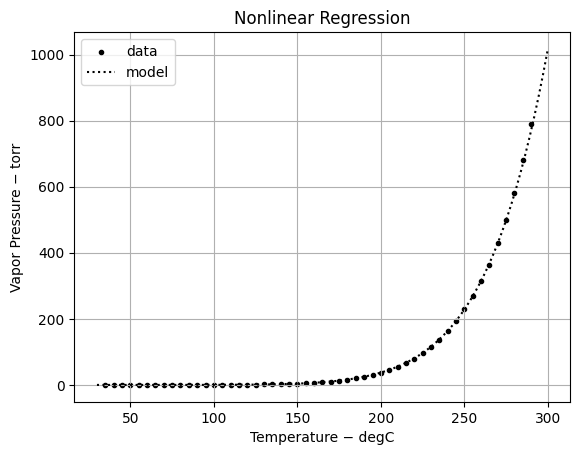

In [17]:
def SSE(params):
    A = params[0] ; B = params[1] ; C = params[2]
    logVPpred = A - B/(C+T)
    e = logVP - logVPpred
    return np.dot(e,e)
from scipy.optimize import minimize
result = minimize(SSE,(A,B,C))
print(result.x)
# plot data
pylab.figure()
pylab.scatter(T,VP,c='k',marker='.',label='data')
pylab.grid()
pylab.xlabel('Temperature − degC')
pylab.ylabel('Vapor Pressure − torr')
# regressed estimates for parameters
A = result.x[0]
B = result.x[1]
C = result.x[2]
# plot model curve
Tplot = np.linspace(30.,300.,100)
VPplot = 10**(A-B/(C+Tplot))
pylab.plot(Tplot,VPplot,c='k',ls=':',label='model')
pylab.legend()
pylab.title('Nonlinear Regression')

Python Code for Nonlinear Regression - 2

R−squared =  0.9999929675993429
Standard error of the estimate =  0.0044504991612524854


Text(0.5, 1.0, 'Residuals vs. Fits')

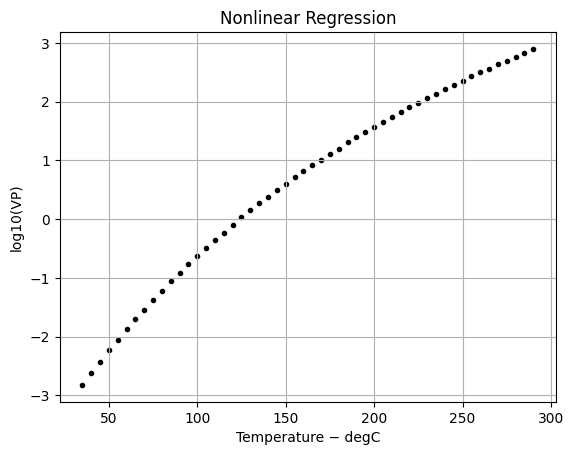

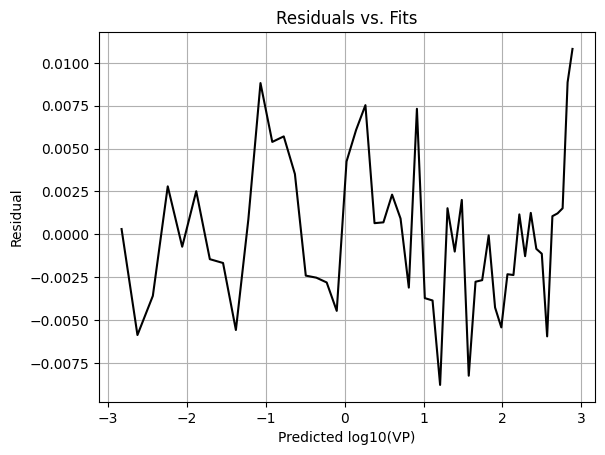

In [18]:
pylab.figure()
pylab.scatter(T,logVP,c='k',marker='.',label='data')
pylab.grid()
pylab.xlabel('Temperature − degC')
pylab.ylabel('log10(VP)')
pylab.title('Nonlinear Regression')
# regression statistics
SSe = SSE(result.x)
n = len(T)
SST = np.var(logVP)*(n-1)
R2 = 1 - SSe/SST
se = np.sqrt(SSe/(n-3))
print('R−squared = ',R2)
print('Standard error of the estimate = ',se)
logVPpred = A - B/(C+T)
e = logVP - logVPpred
pylab.figure()
pylab.plot(logVPpred,e,c='k')
pylab.grid()
pylab.xlabel('Predicted log10(VP)')
pylab.ylabel('Residual')
pylab.title('Residuals vs. Fits')


15.21  The data below have been collected, and a model has been proposed,  

Use nonlinear regression to fit this model to the data, and check adequacy of your model. Show plots of the data and the model line and the residuals versus the predicted  y values.

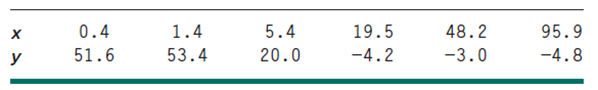

We will write a Python script using minimize from the SciPy optimize submodule.

  message: Optimization terminated successfully.
  success: True
   status: 0
      fun: 74.03657783016375
        x: [-4.852e+00  6.527e+01 -1.657e-01]
      nit: 21
      jac: [ 1.907e-06 -4.768e-06  7.629e-06]
 hess_inv: [[ 1.915e-01 -1.562e-01 -1.087e-03]
            [-1.562e-01  6.038e-01 -1.202e-03]
            [-1.087e-03 -1.202e-03  3.105e-05]]
     nfev: 146
     njev: 34
[-4.8521 65.2657 -0.1657]


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_numdiff.py:590: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0


Text(0, 0.5, 'residual')

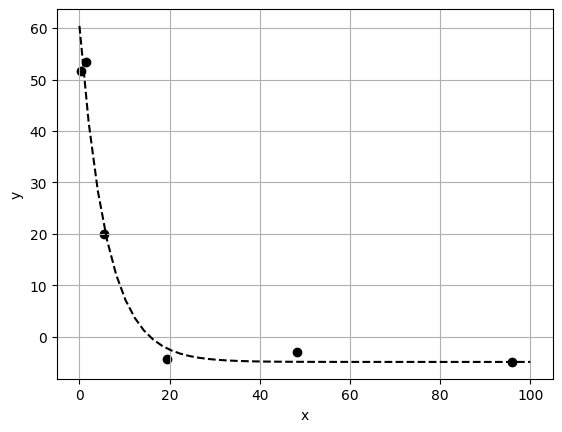

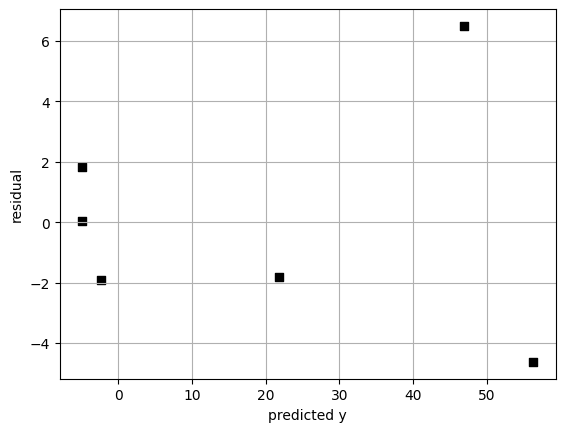

In [22]:
import numpy as np
from scipy.optimize import minimize
import pylab

x = np.array([0.4,1.4,5.4,19.5,48.2,95.9])
y = np.array([51.6,53.4,20.,-4.2,-3.,-4.8])

def SSE(params):
    a = params[0]
    b = params[1]
    c = params[2]
    ypred = a + b*np.exp(c*x)
    e = y - ypred
    return np.dot(e,e)

a = 2.
b = 2.
c = -2.

result = minimize(SSE,[a,b,c])
print(result)
print(result.x)

a = result.x[0]
b = result.x[1]
c = result.x[2]

pylab.scatter(x,y,c='k')
xplot = np.linspace(0.,100.)
yplot = a + b*np.exp(c*xplot)
pylab.plot(xplot,yplot,c='k',ls='--')
pylab.grid()
pylab.xlabel('x')
pylab.ylabel('y')

ypred = a + b*np.exp(c*x)
e = y - ypred
pylab.figure()
pylab.scatter(ypred,e,c='k',marker='s')

pylab.grid()
pylab.xlabel('predicted y')
pylab.ylabel('residual')
